# Lab 09 1 XOR
* XOR 문제를 Deep Learning를 활용해 풀어보도록 하겠습니다.

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


### 강의에 설명할 Data입니다
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제입니다
* 붉은색과 푸른색으로 0과 1을 표시해 보도록 하겠습니다.

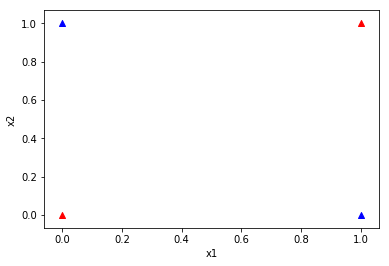

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow Session
### 위 Data를 기준으로 XOR처리를 위한 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data)).repeat()

iter = dataset.make_initializable_iterator()
features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

### W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([2, 1]) )

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

### Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

$$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

In [5]:
hypothesis  = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))

### 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if  &  y=0
\end{align}
$$

* 위 두수식을 합치면 아래과 같습니다
$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [6]:
cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))

learning_rate = 0.01
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴합니다.
* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환합니다.

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

### 가설을 통해 실재 값과 비교한 정확도를 측정합니다

In [8]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))

### Tensorflow를 통한 실행을 위해 Session를 선언합니다.
* 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다. 

In [9]:
EPOCHS = 10001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value = sess.run([train, cost])
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
    h, c, a = sess.run([hypothesis, predicted, accuracy])
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

Iter: 0, Loss: 0.6931
Iter: 1000, Loss: 0.6931
Iter: 2000, Loss: 0.6931
Iter: 3000, Loss: 0.6931
Iter: 4000, Loss: 0.6931
Iter: 5000, Loss: 0.6931
Iter: 6000, Loss: 0.6931
Iter: 7000, Loss: 0.6931
Iter: 8000, Loss: 0.6931
Iter: 9000, Loss: 0.6931
Iter: 10000, Loss: 0.6931

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


### Neural Network를 통해 XOR해결 
* 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다. 

In [10]:
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [11]:
cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))

In [12]:
EPOCHS = 100001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value = sess.run([train, cost])
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
    h, c, a = sess.run([hypothesis, predicted, accuracy])
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

Iter: 0, Loss: 0.6954
Iter: 5000, Loss: 0.6928
Iter: 10000, Loss: 0.6877
Iter: 15000, Loss: 0.6487
Iter: 20000, Loss: 0.5650
Iter: 25000, Loss: 0.4561
Iter: 30000, Loss: 0.2989
Iter: 35000, Loss: 0.1677
Iter: 40000, Loss: 0.1041
Iter: 45000, Loss: 0.0727
Iter: 50000, Loss: 0.0550
Iter: 55000, Loss: 0.0439
Iter: 60000, Loss: 0.0363
Iter: 65000, Loss: 0.0309
Iter: 70000, Loss: 0.0269
Iter: 75000, Loss: 0.0237
Iter: 80000, Loss: 0.0212
Iter: 85000, Loss: 0.0192
Iter: 90000, Loss: 0.0175
Iter: 95000, Loss: 0.0161
Iter: 100000, Loss: 0.0149

Hypothesis:  [[0.01783397]
 [0.98662925]
 [0.9866325 ]
 [0.01441469]] 
Correct (Y):  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
